# Project 04: Predicting a Continuous Target with Regression (Titanic)
**Author:**  James Pinkston  
**Date:**  November 16, 2025  
**Objective:**  P4: This project will predict fare, the amount of money paid for the journey, using features in the Titanic dataset.

## Section 1. Import and Inspect the Data

### 1.1 Import Dependencies


In [11]:
# All imports should be at the top of the notebook

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score

### 1.2 Load the Titanic dataset directly from the seaborn library.

In [12]:
# Load Titanic Dataset
titanic = sns.load_dataset('titanic')

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2. Data Exploration and Preparation

### 2.1 Prepare the Titanic data for regression modeling.

- Impute missing values for age using the median
- Drop rows with missing fare (or impute if preferred)
- Create numeric variables (e.g., family_size from sibsp + parch + 1)
- Optional - convert categorical features (e.g. sex, embarked) if you think they might help your prediction model. (We do not know relationships until we evaluate things.)

In [13]:
# Impute missing values for age
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Drop rows with missing fare
titanic = titanic.dropna(subset=['fare'])

# Create a numeric variable for family_size
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] +1

# Convert categorical features
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['alone'] = titanic['alone'].astype(int)

C:\Users\james\AppData\Local\Temp\ipykernel_4836\859569866.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


## Section 3. Feature Selection and Justification

### 3.1 Define multiple combinations of features to use as inputs to predict fare.

- Use unique names (X1, y1, X2, y2, etc.) so results are visible and can be compared at the same time.

*Remember the inputs, usually X, are a 2D array. The target is a 1D array.*

Case 1. age only

In [14]:
# case 1. age
X1 = titanic[['age']]
y1 = titanic[['fare']]

Case 2. family_size only

In [15]:
# case 2. family_size
X2 = titanic[['family_size']]
y2 = titanic[['fare']]

Case 3. age and family size

In [16]:
# case 3. age and family_size
X3 = titanic[['age', 'family_size']]
y3 = titanic[['fare']]

Case 4. sex and alone

In [17]:
# case 4. sex and alone
X4 = titanic[['sex', 'alone']]
y4 = titanic[['fare']]

### Reflection Questions

1. Why might these features affect a passenger's fare:  <span style="color:darkgreen;">**Children may have had a lower fare, family size may have received discounts (for multiple tickets), and solo passengers may have paid a premium for traveling alone.**</span>

2. List all available features:  <span style="color:darkgreen;">**survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone**</span>

3. Which other features could improve predictions and why:  <span style="color:darkgreen;">**Pclass could improved predictions because a higher class room would have demaned a higher fare.**</span>

4. How many variables are in your Case 4:  <span style="color:darkgreen;">**Two**</span>

5. Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs:  <span style="color:darkgreen;">**I chose sex and alone for Case 4 because I'd be interested in seeing if solo males paid more or less vs solo females, and also to see if solo travelers paid a higher premium like they do today.**</span>

## Section 4. Train a Regression Model (Linear Regression)

### 4.1 Split the Data

Split the data into training and test sets.

In [18]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

### 4.2 Train and Evaluate Linear Regression Models (all 4 cases)

We'll use a more concise approach - create each model and immediately call the fit() method.

In [19]:
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions

y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)

y_pred_train3 = lr_model3.predict(X3_train)
y_pred_test3 = lr_model3.predict(X3_test)

y_pred_train4 = lr_model4.predict(X4_train)
y_pred_test4 = lr_model4.predict(X4_test)

### 4.3 Report Performance

In [20]:
print("Case 1: Training R²:", r2_score(y1_train, y_pred_train1))
print("Case 1: Test R²:", r2_score(y1_test, y_pred_test1))
print("Case 1: Test RMSE:", root_mean_squared_error(y1_test, y_pred_test1))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y_pred_test1))

print("Case 2: Training R²:", r2_score(y2_train, y_pred_train2))
print("Case 2: Test R²:", r2_score(y2_test, y_pred_test2))
print("Case 2: Test RMSE:", root_mean_squared_error(y2_test, y_pred_test2))
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y_pred_test2))

print("Case 3: Training R²:", r2_score(y3_train, y_pred_train3))
print("Case 3: Test R²:", r2_score(y3_test, y_pred_test3))
print("Case 3: Test RMSE:", root_mean_squared_error(y3_test, y_pred_test3))
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y_pred_test3))

print("Case 4: Training R²:", r2_score(y4_train, y_pred_train4))
print("Case 4: Test R²:", r2_score(y4_test, y_pred_test4))
print("Case 4: Test RMSE:", root_mean_squared_error(y4_test, y_pred_test4))
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y_pred_test4))

Case 1: Training R²: 0.009950688019452314
Case 1: Test R²: 0.0034163395508415295
Case 1: Test RMSE: 37.97164180172938
Case 1: Test MAE: 25.28637293162364
Case 2: Training R²: 0.049915792364760736
Case 2: Test R²: 0.022231186110131973
Case 2: Test RMSE: 37.6114940041967
Case 2: Test MAE: 25.02534815941641
Case 3: Training R²: 0.07347466201590014
Case 3: Test R²: 0.049784832763073106
Case 3: Test RMSE: 37.0777586646559
Case 3: Test MAE: 24.284935030470688
Case 4: Training R²: 0.07011035082175288
Case 4: Test R²: 0.1910999836523436
Case 4: Test RMSE: 34.20975124878259
Case 4: Test MAE: 21.96622606134518


### Section 4 Reflection Questions

Compare the train vs test results for each.

1. Did Case 1 overfit or underfit? Explain:  <span style="color:darkgreen;">**Underfit:  Both numbers are extremely low as age has almost no relationship with fare.**</span>

2. Did Case 2 overfit or underfit? Explain:  <span style="color:darkgreen;">**Underfit:  Case 2 still has very low scores since large families tended to buy cheaper fare tickets and small families were in all classes.**</span>

3. Did Case 3 overfit or underfit? Explain:  <span style="color:darkgreen;">**Underfit:  Case 3 was slightly better but this model still includes two weak predictors.**</span>

4. Did Case 4 overfit or underfit? Explain:  <span style="color:darkgreen;">**Underfit:  Case 4 was still an underfit, but was the best of the four cases. Solo travelers were found in all classes, but more commonly bought cheaper tickets. Women were more likely to be in a higher class.**</span>

Adding Age

1. Did adding age improve the model:  <span style="color:darkgreen;">**No.**</span>

2. Propose a possible explanation (consider how age might affect ticket price, and whether the data supports that):  <span style="color:darkgreen;">**Passengers of all ages were in all classes. Case 4 did not include age at all and performed the best out of all the cases.**</span>

Worst

1. Which case performed the worst:  <span style="color:darkgreen;">**Case 1 performed the worst.**</span>

2. How do you know:  <span style="color:darkgreen;">**It has the lowest R^2 (0.0034) and the highest RMSE and MAE. Age has almost zero correlation with fare.**</span>

3. Do you think adding more training data would improve it (and why/why not):  <span style="color:darkgreen;">**No. Age is pretty much a useless predictor and the sample size won't change that.**</span>

Best

1. Which case performed the best:  <span style="color:darkgreen;">**Case 4 performed the best.**</span>

2. How do you know:  <span style="color:darkgreen;">**Case 4 has the highest R^2 (0.191) and the lowest RMSE and MAE. Socioeconomic features (such as sex) correlate better to fare amount than the other features.**</span>

3. Do you think adding more training data would improve it (and why/why not):  <span style="color:darkgreen;">**Maybe a little bit, but not without a better feature. Pclass is probably the best feature to include for predicting fare.**</span>

## Section 5. Compare Alternative Models

In this section, we will take the best-performing case and explore *other* regression models.

### 5.1 Ridge Regression (L2 Penalty)

Ridge Regression is a regularized version of linear regression that adds a penalty to large coefficient values. It uses the L2 penalty, which adds the sum of squared coefficients to the loss function.

This "shrinks" the coefficients, reducing the model’s sensitivity to any one feature while still keeping all features in the model.

- Penalty term:  L2 = sum of squared weights
- Effect:  Shrinks weights, helps reduce overfitting, keeps all features

In [21]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)
y_pred_ridge = ridge_model.predict(X4_test)

### 5.2 Elastic Net (L1 + L2 combined)

Lasso Regression uses the L1 penalty, which adds the sum of absolute values of the coefficients to the loss function. Lasso can shrink some coefficients all the way to zero, effectively removing less important features. This makes it useful for feature selection.

- Penalty term: L1 = sum of absolute values of weights
- Effect: Can shrink some weights to zero (drops features), simplifies the model
Elastic Net combines both L1 (Lasso) and L2 (Ridge) penalties. It balances the feature selection ability of Lasso with the stability of Ridge.

We control the balance with a parameter called l1_ratio:

- If l1_ratio = 0, it behaves like Ridge
- If l1_ratio = 1, it behaves like Lasso
- Values in between mix both types
- Penalty term: α × (L1 + L2)
- Effect: Shrinks weights and can drop some features — flexible and powerful

In [22]:
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)
y_pred_elastic = elastic_model.predict(X4_test)

### 5.3 Polynomial Regression

Linear regression is a simple two dimensional relationship - a simple straight line. But we can test more complex relationships. Polynomial regression adds interaction and nonlinear terms to the model. Be careful here - higher-degree polynomials can easily overfit.

In [43]:
# Set up the poly inputs
poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(X1_train)
x_test_poly = poly.transform(X1_test)

In [44]:
# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y1_train)
y_pred_poly = poly_model.predict(x_test_poly)

### 5.4 Visualize Polynomial Cubic Fit (for 1 input feature)

Choose a case with just one input feature and plot it. For example:

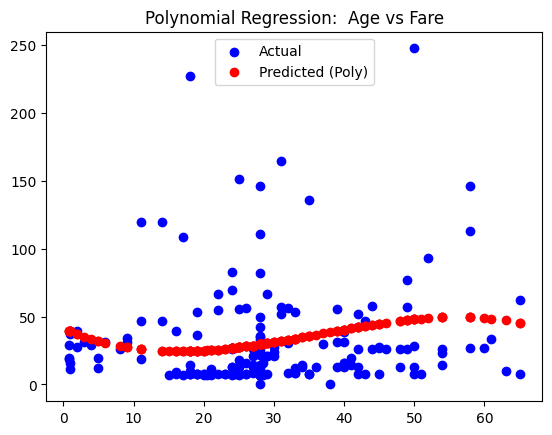

In [45]:
plt.scatter(X1_test, y1_test, color='blue', label='Actual')
plt.scatter(X1_test, y_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression:  Age vs Fare")
plt.show()

#### 5.4 Reflections

1. What patterns does the cubic model seem to capture:  <span style="color:darkgreen;">**The cubic model captures minor fluctuations in the data, showing small increases and decreases in fare by age, but really it just shows that more people bought cheaper fares than any real correlation.**</span>

2. Where does it perform well or poorly:  <span style="color:darkgreen;">**It performs poorly overall because age has almost no correlation to fare.**</span>

3. Did the polynomial fit outperform linear regression:  <span style="color:darkgreen;">**No.**</span>

4. Where (on the graph or among which kinds of data points) does it fit best:  <span style="color:darkgreen;">**It fits best on the edges of the age range.**</span>

### 5.5 Compare All Models

Create a summary table or printout comparing all models:

In [46]:
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {root_mean_squared_error(y_true, y_pred):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Linear", y4_test, y_pred_test4)
report("Ridge", y4_test, y_pred_ridge)
report("ElasticNet", y4_test, y_pred_elastic)
report("Polynomial", y1_test, y_pred_poly)

Linear R²: 0.191
Linear RMSE: 34.21
Linear MAE: 21.97

Ridge R²: 0.191
Ridge RMSE: 34.21
Ridge MAE: 21.97

ElasticNet R²: 0.155
ElasticNet RMSE: 34.96
ElasticNet MAE: 22.63

Polynomial R²: -0.003
Polynomial RMSE: 38.10
Polynomial MAE: 25.30



### 5.6 Visualize Higher Order Polynomial (for the same 1 input case)

In [49]:
# Set up the new poly inputs
poly = PolynomialFeatures(degree=6)
x_train_poly = poly.fit_transform(X1_train)
x_test_poly = poly.transform(X1_test)

# Use the new poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y1_train)
y_pred_poly = poly_model.predict(x_test_poly)

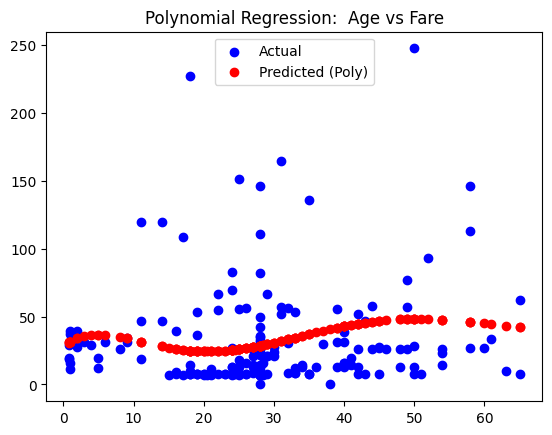

In [50]:
plt.scatter(X1_test, y1_test, color='blue', label='Actual')
plt.scatter(X1_test, y_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression:  Age vs Fare")
plt.show()

#### 5.6 Reflection

<span style="color:darkgreen;">**Increasing the polynomial degree from 3 to 6 does not noticeably change the curve in the scatter plot. This is because age has nearly zero correlation to fare.**</span>

## Section 6. Final Thoughts & Insights

### 6.1 Summarize Findings

1. What features were most useful?  <span style="color:darkgreen;">**Case 4 (sex and alone) were the most useful features that I tested.**</span>

2. What regression model performed best?  <span style="color:darkgreen;">**Both the Linear Regression Model and the Ridge Model performed the best as they had the same results.**</span>

3. How did model complexity or regularization affect results?  <span style="color:darkgreen;">**Model complexity (using age) did not perform better, but that was mainly due to age being a nearly useless predictor.**</span>

 
### 6.2 Discuss Challenges

1. Was fare hard to predict? Why?  <span style="color:darkgreen;">**Yes, mostly due to the features that were selected. Age was nearly useless, and quite possibly the worst predictor. Pclass would have been much better, but was not chosen, even for the custom Case 4.**</span>

2. Did skew or outliers impact the models?  <span style="color:darkgreen;">**Yes. A few passengers paid very high fares. Outliers can make R^2 and RMSE misleading.**</span>


### 6.3 Optional Next Steps

1. Try different features besides the ones used (e.g., pclass, sex if you didn't use them this time):  <span style="color:darkgreen;">**Pclass would probably be the best feature to use for a fare prediction model.**</span>

2. Try predicting age instead of fare:  <span style="color:darkgreen;">**Age would have a much different correlation structure, features useful would probably be sex, pclass, and family_size.**</span>

3. Explore log transformation of fare to reduce skew:  <span style="color:darkgreen;">**This would probably greatly help the prediction model as it compresses large values, reducing the difference between extreme and typical fares.**</span>